In [1]:
import pandas as pd
import os
import langid
import seaborn as sns
import spacy
from langdetect import detect
from spacy.tokens import Doc
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [2]:
train=pd.read_csv(r"D:\ML Projects\proj1\train_data.txt",sep=':::',engine='python',header=None)
train.columns=['Id','Name','Gener',"Description"]

In [3]:
test=pd.read_csv(r"D:\ML Projects\proj1\test_data.txt",sep=':::',names=['Id', 'Name', 'Description'],engine='python').reset_index(drop=True)

In [4]:
train.head(10)

,Id,Name,Gener,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
5,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
6,7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...
7,8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...
8,9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss..."
9,10,Spirits (2014/I),horror,Four high school students embark on a terrify...


In [5]:
test.head(10)

,Id,Name,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
5,6,Riddle Room (2016),Emily Burns is being held captive in a room w...
6,7,L'amica (1969),The beautiful but neglected wife of a brillia...
7,8,Ina Mina Dika (1989),Vasu Inamdar (Ina) suffers from a disorder wh...
8,9,Equinox Special: Britain's Tornados (2005),An insight into the tornados that hit Kensal ...
9,10,Press (2011),Press is a story of young people overwhelmed ...


In [6]:
train.describe()

,Id
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54214 non-null  int64 
 1   Name         54214 non-null  object
 2   Gener        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [8]:
train.isnull().sum()

Id             0
Name           0
Gener          0
Description    0
dtype: int64

In [9]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'counts')

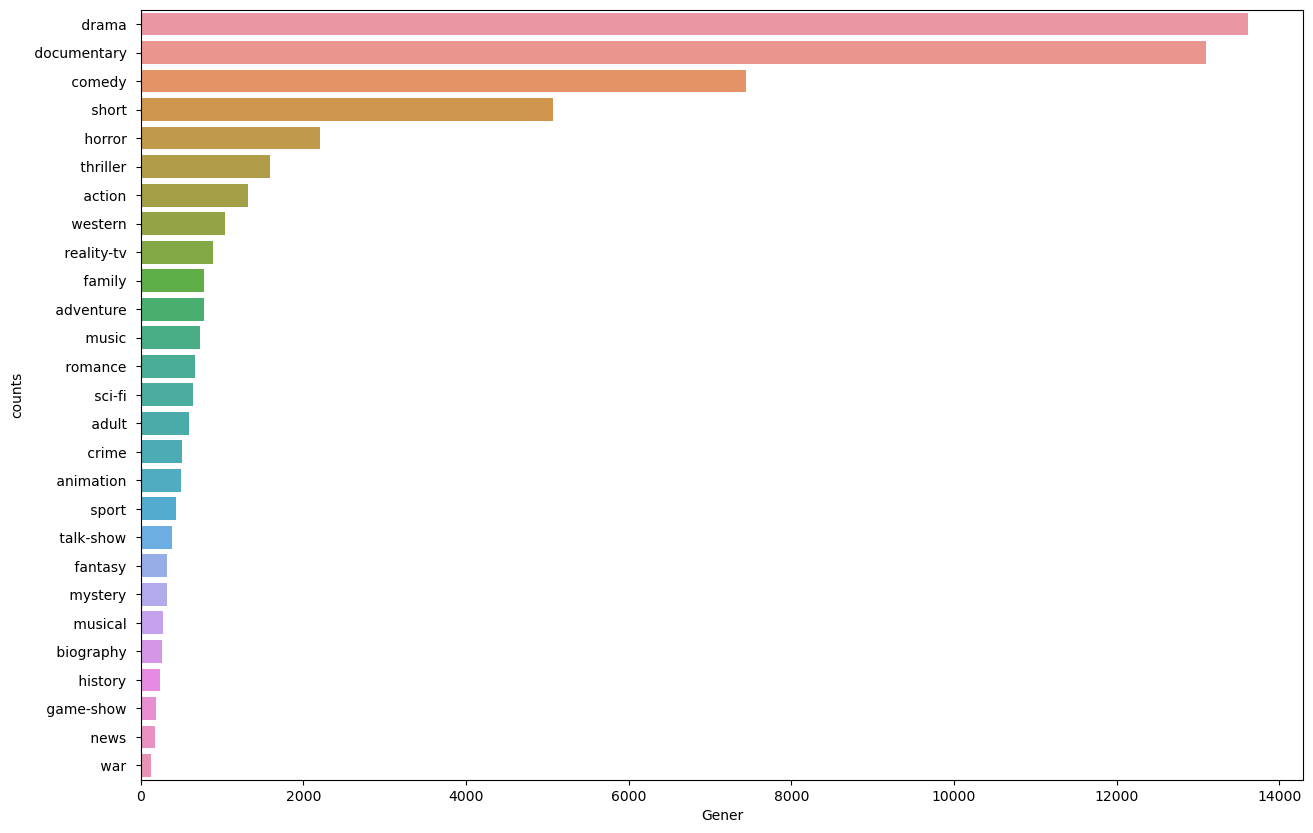

In [10]:
plt.figure(figsize=(15,10))
counts=train.Gener.value_counts()
sns.barplot(x=counts, y=counts.index, orient='h')
plt.xlabel('Gener')
plt.ylabel('counts')

In [11]:
train.loc[train['Description'].str.contains(r'@\S+')].head()

,Id,Name,Gener,Description
242,243,Túlvilági beszélö (1992),documentary,Mail <svaradi@sprynet.com> for translation. T...
1880,1881,Rokonok (1954),drama,Mail <svaradi@sprynet.com> for translation. F...
1986,1987,Lila akác (1934),comedy,Mail <svaradi@sprynet.com> for translation. S...
6579,6580,A csúnya lány (1935),comedy,Mail <svaradi@sprynet.com> for translation. D...
8296,8297,Füszer és csemege (1940),drama,Mail <svaradi@sprynet.com> for translation. 5...


In [12]:
nlp = spacy.load("xx_ent_wiki_sm")
Doc.set_extension("languages", default=None, force=True)

In [13]:
from langdetect import detect
import langid

In [14]:
def detect_language(text):
    # Use langdetect as the primary language detection method
    try:
        lang = detect(text)
        return lang
    except:
        pass

    # If langdetect fails, use langid as a fallback
    lang, _ = langid.classify(text)
    return lang if lang != 'unknown' else None

In [15]:
sample_descriptions = train['Description'].head(10)
detected_languages_sample = sample_descriptions.apply(detect_language)
print(detect_language)

<function detect_language at 0x0000013DD8C78430>


In [16]:
train['Language'] = train['Description'].apply(detect_language)
test['Language'] = test['Description'].apply(detect_language)
train.head()

,Id,Name,Gener,Description,Language
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,en
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,en
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,en
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,en
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,en


In [17]:
train.tail()

,Id,Name,Gener,Description,Language
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,en
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,en
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",en
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,en
54213,54214,Nature's Fury: Storm of the Century (2006),history,"On Labor Day Weekend, 1935, the most intense ...",en


In [18]:
import re
import string


In [19]:
def clean_text(text):
    # Remove strange pattern in different languages if exist
    text = re.sub('Mail <svaradi@sprynet.com> for translation. ','',text)
    # Remove twitter handles
    text = re.sub(r'@\S+', '', text)
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove punctuations
    text = re.sub(f'[{string.punctuation}]','',text)
    # Remove numbers
    text = re.sub(f'[{string.digits}]','',text)
    # Remove single charachters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    return text

In [20]:
train['Description'] = train['Description'].apply(clean_text)
test['Description'] = test['Description'].apply(clean_text)

In [21]:
train[~train.Language.isin(['en'])]

,Id,Name,Gener,Description,Language
210,211,Divorzio alla siciliana (1963),comedy,Il barone Fifě ha bisogno di un erede per ave...,it
242,243,Túlvilági beszélö (1992),documentary,Tollas Tibor az os fordulatot kovetoen katona...,hu
282,283,"""Boogie-woogie 47"" (1980)",drama,En plusieurs familles de Montréal passent lé...,fr
678,679,Pallati 176 (1986),comedy,English comedy by wellknown Albanian theater ...,sq
806,807,Iszony (1965),drama,Mail to author for translation Karasz Nelli a...,hu
...,...,...,...,...,...
53697,53698,Fantasmi e ladri (1959),comedy,Annunziata ha letto diecimila gialli spopola ...,it
53712,53713,Due notti con Cleopatra (1954),comedy,Cleopatra č una donna bellissima ma ha un pic...,it
53878,53879,Gyilkos kedv (1997),drama,Kora delutan egy iskolabol hazatero kislany c...,hu
54165,54166,Az áldozat (1994),documentary,Mail author for translation Az os forradalom ...,hu


In [22]:
from langdetect import detect
from googletrans import Translator

In [ ]:
#Translate other languages
def trans(text):
    try:
        return Translator().translate(text,dest='en').text
    except:
        return text
train.loc[~train['Language'].isin(['en']), 'Description']=train.loc[~train['Language'].isin(['en']),'Description'].apply(trans)
test.loc[~test['Language'].isin(['en']), 'Description']=test.loc[~test['Language'].isin(['en']),'Description'].apply(trans)

In [ ]:
train.drop(columns='Language',inplace=True)
test.drop(columns='Language',inplace=True)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(lowercase=True, #Lowercase chars
                                   ngram_range=(1,1), #Capture only single words in each text(unigrams)
                                   stop_words='english',#Remove stop_words
                                   min_df=2)#Ignore words that appears less than 2 times
x_train = tfidf_vectorizer.fit_transform(train['Description'])
x_test = tfidf_vectorizer.transform(test['Description'])

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
sampler = RandomOverSampler()
x_train_resampled , y_train_resampled = sampler.fit_resample(x_train,train['Gener'])

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x=y_train_resampled.values, palette='rocket')
plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment for better readability
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution')
plt.show()

In [ ]:
from time import time

In [ ]:
a= pd.read_csv(r"D:\ML Projects\proj1\test_data_solution.txt",
                      sep=':::',usecols=[2],header=None).rename(columns={2:'Actual_Genre'})
y_train = train['Gener'].apply(lambda genre: genre if genre.strip() in ['drama','documentary'] else 'other')
y_actual = a['Actual_Genre'].apply(lambda genre: genre if genre.strip() in ['drama','documentary'] else 'other')

In [ ]:
NB = MultinomialNB(alpha=0.3)
start_time = time()
NB.fit(x_train,y_train)
y_pred = NB.predict(x_test)
print('Accuracy :',accuracy_score(y_actual,y_pred))
end_time = time()
print('Running Time : ',round(end_time - start_time,2),'Secounds')
print(classification_report(y_actual, y_pred))